In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df = df[['petal length (cm)','petal width (cm)']]
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

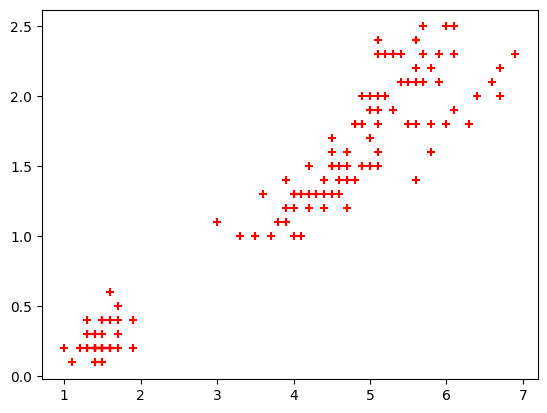

In [11]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'], color='red', marker='+')

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(df[['petal length (cm)']])

df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.2
1,0.067797,0.2
2,0.050847,0.2
3,0.084746,0.2
4,0.067797,0.2


In [15]:
scaler.fit(df[['petal width (cm)']])

df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [16]:
from sklearn.cluster import KMeans

In [17]:
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [18]:
sse

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1615234094205573,
 0.9086343645605608,
 0.6891347851035319,
 0.6228781267329189,
 0.4880262556573533,
 0.5180846231980965]

Text(0, 0.5, 'SSE')

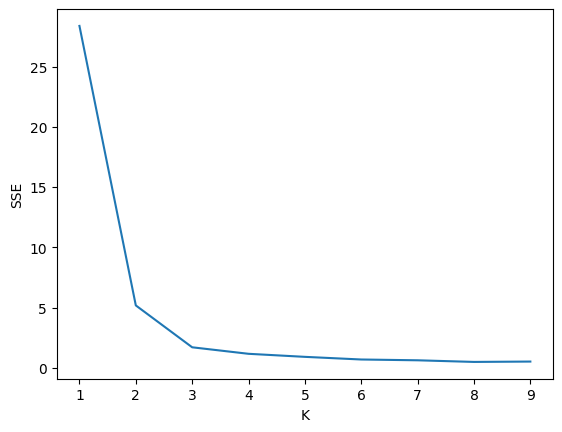

In [20]:
plt.plot(k_range,sse)
plt.xlabel('K')
plt.ylabel('SSE')

In [21]:
km = KMeans(n_clusters=3)

In [23]:
y_pred = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['cluster'] = y_pred
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


Text(0, 0.5, 'petal width (cm)')

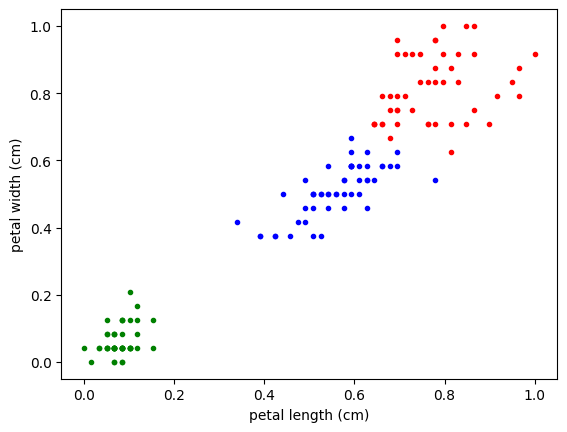

In [28]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='red', marker='.')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='green', marker='.')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='blue', marker='.')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
km.cluster_centers_


array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

Text(0, 0.5, 'petal width (cm)')

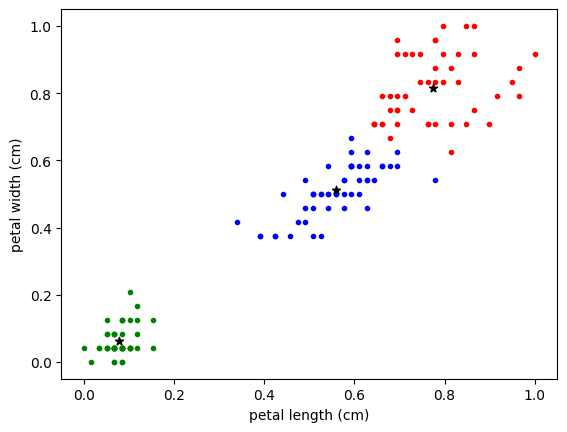

In [31]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='red', marker='.')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='green', marker='.')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='blue', marker='.')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker='*')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')